In [30]:
from mra.helper import *
import pandas as pd

In [8]:
coll = local.driverlicense.xlsx

In [29]:
coll.distinct("Titel", {"Grundgesamtheit": "10 Jahre und älter", "Medientyp": "Mobile Vermarkterreichweite"})

['Ströer Digital',
 'G+J e|MS',
 'Media Impact',
 'BurdaForward',
 'United Internet Media',
 'eBay Advertising Group Deutschland',
 'iq digital',
 'SevenOne Media',
 'SPIEGEL MEDIA',
 'Scout24',
 'BCN - Burda Community Network',
 'YOC',
 'madvertise Media',
 'VICE Digital',
 'CondeNast',
 'Web Media Publishing',
 'teltarif.de Onlineverlag',
 'onvista media sales',
 'QUARTER MEDIA',
 'MAIRDUMONT MEDIA',
 'vwd netsolutions',
 'STYLIGHT',
 'Deutscher Fachverlag',
 'Ad Alliance',
 'Yieldlove',
 'Urban Media',
 'CommonMedia',
 'Alfons W. Gentner Verlag',
 'gutefrage.net']

In [113]:
cur = coll.find({"Grundgesamtheit": "10 Jahre und älter", "Medientyp": "Digitales Gesamtangebot"})
data = list(cur)

In [114]:
df = pd.DataFrame(data)

In [115]:
df.head()

,Analyse,Grundgesamtheit,Kontakte Mio,Kontakte Mio,Medientyp,Studien- teil,Studienteil,Titel,Ungew Fälle auf Basis ZG/Vorfilter,Ungew Fälle auf Basis Gesamt 10+,...,Unique User %,Unique User Mio,Unique User %,Unique User Mio,Vorfilter,Zeitraum,Zielgruppe,_id,_job_id,_src
0,daily digital facts 15.08.2017 / Rangreihe,10 Jahre und älter,NaN,1463.77,Digitales Gesamtangebot,df,NaN,T Online,NaN,68099,...,NaN,NaN,48.1,28.15,Nutzer mobiler und/oder stationärer Angebote (...,April 2017,Gesamt,5d91d628b076fdd7ee315043,5d91d627b076fdd7ee315039,ddf_April-Juli_2017_Angebote_Ranking_Digital.xlsx
1,daily digital facts 15.08.2017 / Rangreihe,10 Jahre und älter,NaN,5123.99,Digitales Gesamtangebot,df,NaN,ebay Kleinanzeigen,NaN,68043,...,NaN,NaN,47.5,27.82,Nutzer mobiler und/oder stationärer Angebote (...,April 2017,Gesamt,5d91d628b076fdd7ee315044,5d91d627b076fdd7ee315039,ddf_April-Juli_2017_Angebote_Ranking_Digital.xlsx
2,daily digital facts 15.08.2017 / Rangreihe,10 Jahre und älter,NaN,107.82,Digitales Gesamtangebot,df,NaN,gutefrage.net,NaN,56022,...,NaN,NaN,39.3,23.04,Nutzer mobiler und/oder stationärer Angebote (...,April 2017,Gesamt,5d91d628b076fdd7ee315045,5d91d627b076fdd7ee315039,ddf_April-Juli_2017_Angebote_Ranking_Digital.xlsx
3,daily digital facts 15.08.2017 / Rangreihe,10 Jahre und älter,NaN,3101.02,Digitales Gesamtangebot,df,NaN,WEB.DE,NaN,60746,...,NaN,NaN,38.2,22.37,Nutzer mobiler und/oder stationärer Angebote (...,April 2017,Gesamt,5d91d628b076fdd7ee315046,5d91d627b076fdd7ee315039,ddf_April-Juli_2017_Angebote_Ranking_Digital.xlsx
4,daily digital facts 15.08.2017 / Rangreihe,10 Jahre und älter,NaN,1179.37,Digitales Gesamtangebot,df,NaN,BILD,NaN,49844,...,NaN,NaN,37.7,22.09,Nutzer mobiler und/oder stationärer Angebote (...,April 2017,Gesamt,5d91d628b076fdd7ee315047,5d91d627b076fdd7ee315039,ddf_April-Juli_2017_Angebote_Ranking_Digital.xlsx


In [116]:
df.Zeitraum.value_counts()

Letzter Monat (Dezember 2017)     720
April 2017                        717
Letzter Monat (November 2017)     716
Letzter Monat (September 2017)    713
Letzter Monat (Oktober 2017)      706
August 2017                       702
Letzter Monat (Februar 2018)      666
Letzter Monat (März 2018)         665
Letzter Monat (Januar 2018)       664
Letzter Monat (April 2018)        641
Name: Zeitraum, dtype: int64

In [117]:
import datetime
MONAT = {
    "Januar": "01",
    "Februar": "02",
    "März": "03",
    "April": "04",
    "Mai": "05",
    "Juni": "06",
    "Juli": "07",
    "August": "08",
    "September": "09",
    "Oktober": "10",
    "November": "11",
    "Dezember": "12"
}
monat = df.Zeitraum.apply(lambda s: s.replace("Letzter Monat (", "").replace(")", "").split())

In [118]:
df["Monat"] = [datetime.datetime.strptime("01." + MONAT[m[0]] + "." + m[1], "%d.%m.%Y") for m in monat]

In [210]:
df["val"] = df["Kontakte Mio"].apply(pd.to_numeric, errors='coerce')

In [211]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6910 entries, 0 to 6909
Data columns (total 25 columns):
Analyse                                 6910 non-null object
Grundgesamtheit                         6910 non-null object
Kontakte  Mio                           702 non-null float64
Kontakte Mio                            6208 non-null object
Medientyp                               6910 non-null object
Studien- teil                           717 non-null object
Studienteil                             1415 non-null object
Titel                                   6910 non-null object
Ungew Fälle  auf Basis  ZG/Vorfilter    702 non-null float64
Ungew Fälle auf Basis Gesamt 10+        6910 non-null object
Ungew Fälle auf Basis ZG/Vorfilter      6208 non-null object
Unique Use  %                           666 non-null float64
Unique User  %                          702 non-null float64
Unique User  Mio                        702 non-null float64
Unique User %                           

In [213]:
g = df.groupby(["Monat"])["val"].sum()

<IPython.core.display.Javascript object>


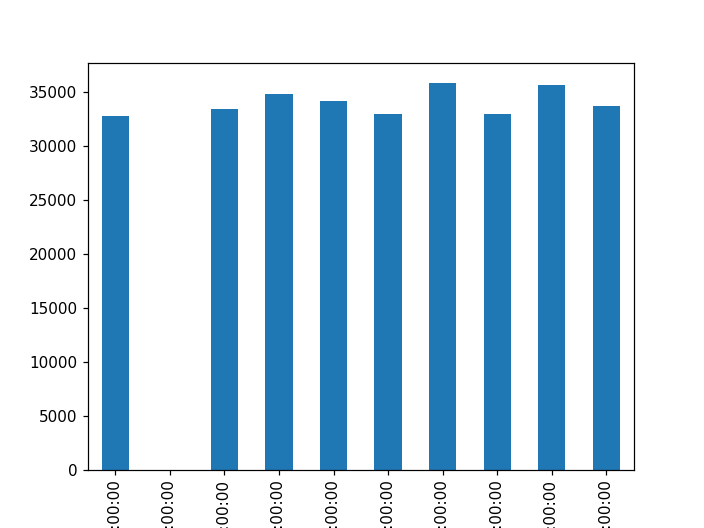

In [214]:
g.plot(kind="bar")

In [24]:
coll.distinct("Medientyp")

['Digitales Gesamtangebot',
 'Website Angebot',
 'Mobiles Gesamtangebot',
 'Digitale Vermarkterreichweite',
 'Internet Vermarkter Reichweite',
 'Mobile Vermarkterreichweite',
 'Internet Vermarkterreichweite']

In [17]:
coll.distinct("Analyse")

['daily digital facts 15.08.2017 / Rangreihe',
 'daily digital facts 18.09.2017 / Rangreihe',
 'daily digital facts 15.08.2017 / Vermarkterranking April 2017 ',
 'daily digital facts 15.08.2017 / Vermarkterranking April 2017',
 'daily digital facts 16.08.2017',
 'daily digital facts 01.02.2018 / Rangreihe',
 'daily digital facts 01.02.2019 / Rangreihe',
 'daily digital facts 15.09.2017 / Rangreihe',
 'daily digital facts 01.03.2018 / Rangreihe',
 'daily digital facts 01.03.2019 / Rangreihe',
 'daily digital facts 09.10.2017 / Rangreihe',
 'daily digital facts 03.04.2018 / Rangreihe',
 'daily digital facts 01.04.2019 / Rangreihe',
 'daily digital facts 17.11.2017 / Rangreihe',
 'daily digital facts 02.05.2018 / Rangreihe',
 'daily digital facts 02.05.2019 / Rangreihe',
 'daily digital facts 05.12.2017 / Rangreihe',
 'daily digital facts 05.06.2018 / Rangreihe',
 'daily digital facts 01.06.2018 / Rangreihe',
 'daily digital facts 03.06.2019 / Rangreihe',
 'daily digital facts 02.01.2018 